# Principal Component Analysis

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def pca_svd(X, L):
    """
    Computes the PCA of the data matrix X via SVD.
    """
    N, D = X.shape
    X_c = X - np.mean(X, axis=0)
    U, s, Vt = np.linalg.svd(X_c, full_matrices=False)

    U = U[:, :L]
    S = np.diag(s[:L])

    Z = U @ S  # X_c @ V = P @ S

    return Z

In [13]:
np.random.seed(0)
X = np.random.rand(10, 3)
L = 2
Z = pca_svd(X, L)
print("PCA transformed data Z:")
print(Z)

PCA transformed data Z:
[[ 0.03663356 -0.07355037]
 [-0.1403412   0.08075599]
 [-0.19597676 -0.19719992]
 [ 0.1385564   0.03273801]
 [ 0.60427013 -0.04559457]
 [-0.49555553  0.60316904]
 [-0.22051144 -0.45106603]
 [-0.24137611 -0.17674101]
 [ 0.40576099  0.43900806]
 [ 0.10853997 -0.2115192 ]]


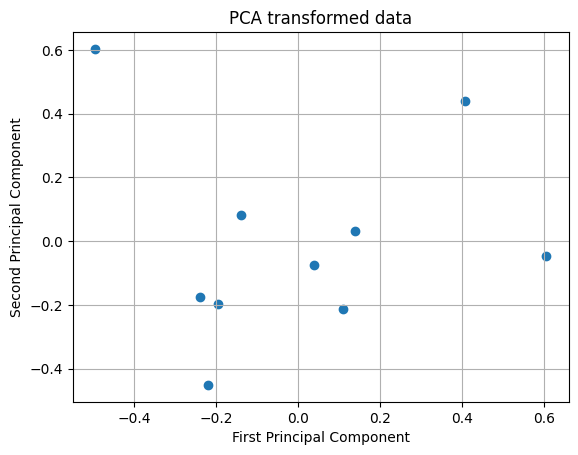

In [14]:
plt.scatter(Z[:, 0], Z[:, 1])
plt.title("PCA transformed data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid()
plt.show()

In [15]:
def pca_cov(X, L):
    """
    Computes the PCA of the data matrix X via Covariance Matrix.
    """
    N, D = X.shape
    X_c = X - np.mean(X, axis=0)
    K = X_c.T @ X_c

    eigenvalues, eigenvectors = np.linalg.eigh(K)

    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]

    W = eigenvectors[:, :L]
    Z = X_c @ W

    return Z

In [16]:
Z = pca_cov(X, L)
print("PCA transformed data Z:")
print(Z)

PCA transformed data Z:
[[-0.03663356  0.07355037]
 [ 0.1403412  -0.08075599]
 [ 0.19597676  0.19719992]
 [-0.1385564  -0.03273801]
 [-0.60427013  0.04559457]
 [ 0.49555553 -0.60316904]
 [ 0.22051144  0.45106603]
 [ 0.24137611  0.17674101]
 [-0.40576099 -0.43900806]
 [-0.10853997  0.2115192 ]]


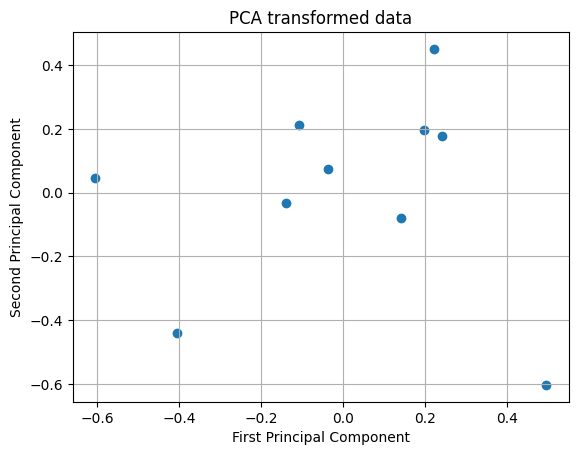

In [17]:
plt.scatter(Z[:, 0], Z[:, 1])
plt.title("PCA transformed data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid()
plt.show()